In [1]:
from fastbook import *

In [3]:
# continue to reproduce 'from scratch' end-to-end SGD example
x = torch.arange(0,20).float; x

<function Tensor.float>

In [23]:
# need to use torch.arange() torch.range() is deprecated
# need to use .float() to apply a method on the tensor
# (we are not retrieving a property)
x = torch.arange(0, 20).float(); x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

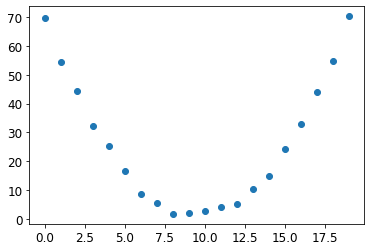

In [24]:
y = 0.75 * (x - 9.5) ** 2 + 1 + torch.randn(20) # quadratic + noise
# plot_function(x, y) # works only on a function
plt.scatter(x,y)

In [25]:
# recast quadratic equation as input and parameters
# rather than find the optimal function from infinite number of functions
# we are given the hint that our function is quadratic
# we want to find the 3 parameters a,b,c
# at which point we have found the optimal function we seek

def f(x, params):
    a, b, c = params # split out 3 params
    return a*(x**2) + (b*x) + c

In [43]:
# we know target is continuous; hence we choose mse as our loss func
# def loss_func(predictions, targets):
#     return ((predictions - targets) ** 2).mean().sqrt()

# try without sqrt()
def loss_func(predictions, targets):
    return ((predictions - targets) ** 2).mean()

In [44]:
# now to apply 7 step process
# step 1: init params
params = torch.randn(3).requires_grad_()
params

tensor([ 2.1174, -1.7118,  0.1651], requires_grad=True)

In [45]:
# step 2: calc predictions
preds = f(x, params)
preds

tensor([1.6513e-01, 5.7073e-01, 5.2111e+00, 1.4086e+01, 2.7196e+01, 4.4541e+01, 6.6121e+01, 9.1935e+01, 1.2198e+02, 1.5627e+02, 1.9479e+02, 2.3754e+02, 2.8453e+02, 3.3575e+02, 3.9121e+02, 4.5090e+02,
        5.1483e+02, 5.8299e+02, 6.5539e+02, 7.3202e+02], grad_fn=<AddBackward0>)

In [46]:
preds.shape

torch.Size([20])

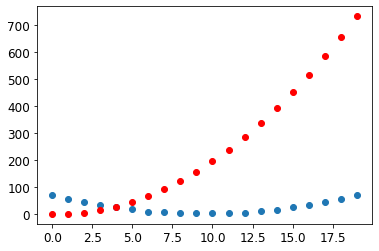

In [47]:
# viz
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(x, y)
    ax.scatter(x, to_np(preds), color='red') # tensor -> numpy

show_preds(preds)

In [48]:
# step 3: calc loss
loss = loss_func(preds, y)
loss

tensor(98972.6641, grad_fn=<MeanBackward0>)

In [49]:
# step 4: calc gradient
loss.backward() # ??? backward() applied on loss
params.grad

tensor([105182.4219,   6725.1533,    438.3566])

In [50]:
params # note params is different from params.grad
# but params did not change, yet

tensor([ 2.1174, -1.7118,  0.1651], requires_grad=True)

In [51]:
# step 5: apply step function
lr = 1e-5
params.data -= params.grad.data * lr # notice use of .data
# if we had not separately asked for params.grad 2 cells ago,
# could have used params.data -= params.
params.grad = None

In [52]:
params

tensor([ 1.0656, -1.7791,  0.1608], requires_grad=True)

tensor([ 1.6075e-01, -5.5273e-01,  8.6495e-01,  4.4138e+00,  1.0094e+01,  1.7905e+01,  2.7847e+01,  3.9921e+01,  5.4125e+01,  7.0461e+01,  8.8928e+01,  1.0953e+02,  1.3226e+02,  1.5712e+02,
         1.8411e+02,  2.1323e+02,  2.4448e+02,  2.7787e+02,  3.1338e+02,  3.5103e+02], grad_fn=<AddBackward0>)


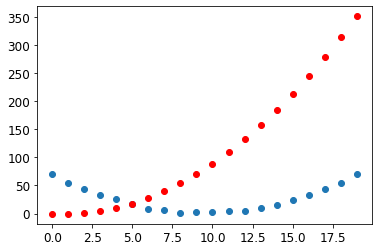

In [53]:
# step 6: make preds again, check for loss, see if improved
preds = f(x, params)
print(preds)
show_preds(preds)

In [ ]:
# no improvement???
# likely because we called params.grad already,
# hence no effect when we call params.grad.data

# notice in function below we do not call params.grad separately

In [54]:
# repeat loop
def apply_step(params, prn=True):
    preds = f(x, params)
    loss = loss_func(preds, y)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item()) # interesting syntax
    return preds

for i in range(10): apply_step(params)

19266.927734375
4184.1533203125
1330.0223388671875
789.9236450195312
687.7108154296875
668.3594360351562
664.6878662109375
663.9835205078125
663.840576171875
663.8038330078125


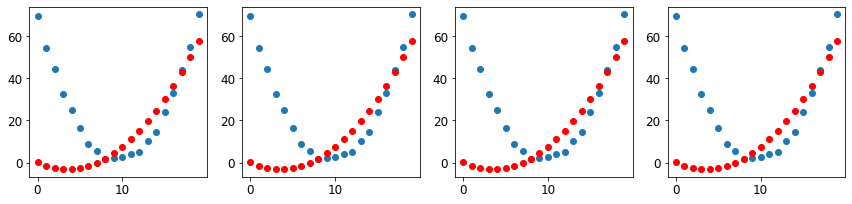

In [55]:
_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)

plt.tight_layout()
# seems to have stopped improving because we had 10 iterations above

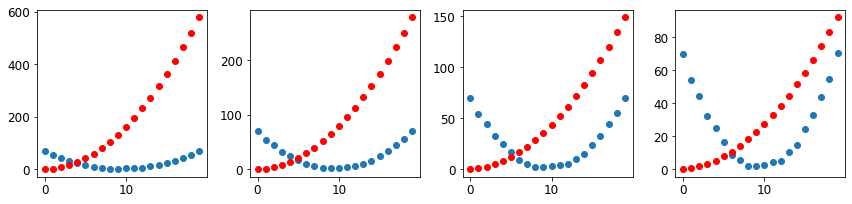

In [56]:
# re-init params and re-do
params = torch.randn(3).requires_grad_()

_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)

plt.tight_layout()

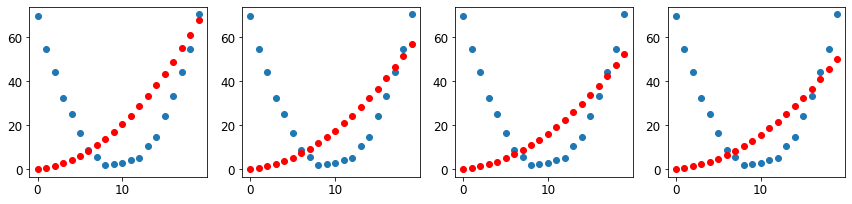

In [57]:
# notice change in vertical scale -- model is improving!
# repeat 4 more iterations
_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)

plt.tight_layout()

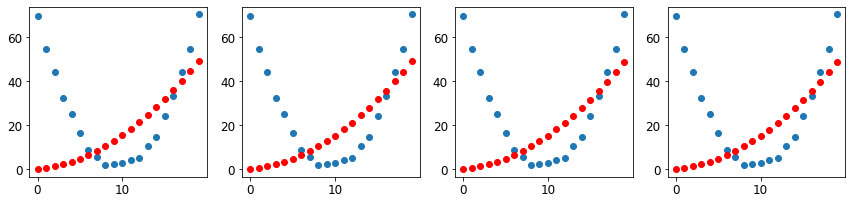

In [58]:
_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)

plt.tight_layout()

In [ ]:
# stopped improving - perhaps a higher lr might help